In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as integ

mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [ ]:
# Basic Function Definitions

def Q(deltaS, args):
    """
    Defines q in the system of ODES
    
    Parameters:
        deltaS: array, values to solve over
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    """
    return args[4]*(args[1]*args[2] - args[0]*deltaS)


def dS1dt(deltaS, args):
    """
    Defines Equation 1 of the system of ODES
    
    Parameters:
        deltaS: array, values to solve over
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    """
    
    return -args[3] + np.absolute(Q(deltaS, args))*deltaS

def dS2dt(deltaS, args):
    """
    Defines Equation 2 of the system of ODES
    
    Parameters:
        deltaS: array, values to solve over
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    """
    
    return args[3] - np.absolute(Q(deltaS, args))*deltaS

def DeltaSdt(deltaS, args):
    """
    Defines the single equation ODE for Delta S rather than S1 and S2
    
    Parameters:
        deltaS: array, values to solve over
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    """
    return dS2dt(deltaS, args) - dS1dt(deltaS,args)

def AnalyticEQS(args):
    """
    Takes the given parameters and calculates deltaS for the 3 equilibrium points. Returns None for any imaginary solutions given the parameters.
    
    Parameters:
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    Output:
        Array: [eqP1, eqP2, eqP3], all values are a float if solution is real or None if it is imaginary
    """
    
    radicand1 = 1/4 - args[3]*args[0]/(args[4]*args[1]**2*args[2]**2)
    radicand2 = 1/4 + args[3]*args[0]/(args[4]*args[1]**2*args[2]**2)
    
    if radicand1 >= 0:
        eqP1 = args[1]*args[2] * (1/2 + np.sqrt(1/4 - args[3]*args[0]/(args[4]*(args[1]**2)*(args[2]**2)))) / args[0]
        eqP2 = args[1]*args[2] * (1/2 - np.sqrt(1/4 - args[3]*args[0]/(args[4]*(args[1]**2)*(args[2]**2)))) / args[0]
    else:
        eqP1 = None
        eqP2 = None
    
    if radicand2 >= 0:
        eqP3 = args[1]*args[2] * (1/2 + np.sqrt(1/4 + args[3]*args[0]/(args[4]*(args[1]**2)*(args[2]**2)))) / args[0]
    else:
        eqP3 = None
    
    return [eqP1, eqP2, eqP3]
    


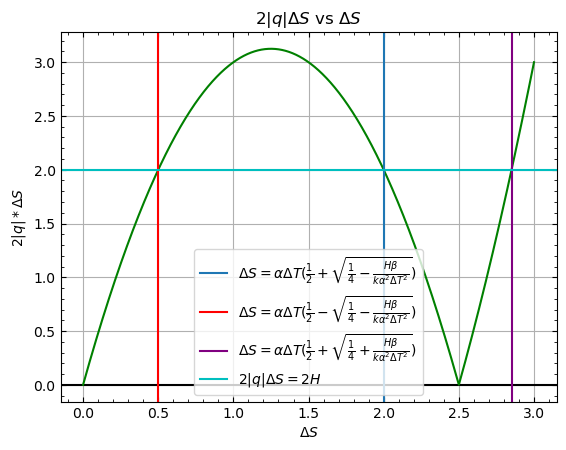

In [101]:
# Plotting 2|q|DeltaS vs Delta S

args = [1,2.5,1,1,1] # set args = [beta, alpha, DT, H, k]
eqs = AnalyticEQS(args) # get equilibrium solutions given the args above

# find range of dS needed and then set dS as 10000 evenly spaced points between the max and min
dSmin = round(min(eqs)-0.5) # Min is the smallest of the equilibrium points minus .5 to get some room on the side
dSmax = round(max(eqs)+0.5) # Max is the largest of the equilibrium points plu s.5 to get some room on the side
deltaS = np.linspace(dSmin,dSmax,10000)



plt.grid()
plt.axhline(0,color='k') # Plot a line on the x-axis for ease of viewing
plt.plot(deltaS, 2*np.absolute(Q(deltaS,args))*deltaS,color='g') # Plot 2|Q|DeltaS vs DeltaS

# The following 6 lines are checking an EQ solution is real, if so plots a vertical line at said EQ soltion if it is imaginary it ignores that solution
if eqs[0] != None:
    plt.axvline(eqs[0], label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} + \sqrt{\frac{1}{4} - \frac{H\beta}{k\alpha^2 \Delta T^2}})$')
if eqs[1] != None:
    plt.axvline(eqs[1], color='r', label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} - \sqrt{\frac{1}{4} - \frac{H\beta}{k\alpha^2 \Delta T^2}})$')
if eqs[2] != None:
    plt.axvline(eqs[2], color='purple', label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} + \sqrt{\frac{1}{4} + \frac{H\beta}{k\alpha^2 \Delta T^2}})$')
plt.axhline(2*args[3], color='c', label=r'$2|q| \Delta S = 2H$') # Plot a horizontal line at 2*H

plt.legend()
plt.xlabel(r'$\Delta S$')
plt.ylabel(r'$2|q|*\Delta S$')
plt.title(r'$2|q|\Delta S$ vs $\Delta S$');

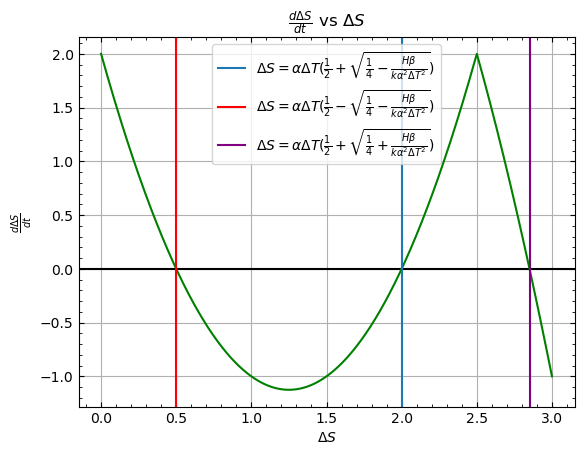

In [ ]:
# Plotting dDeltaS/dt vs DeltaS

plt.grid()
plt.axhline(0,color='k') # Plot a line on the x-axis for ease of viewing
plt.plot(deltaS, DeltaSdt(deltaS,args),color='g') # Plot dDeltaS/dt vs DeltaS

# The following 6 lines are checking an EQ solution is real, if so plots a vertical line at said EQ soltion if it is imaginary it ignores that solution
if eqs[0] != None:
    plt.axvline(eqs[0], label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} + \sqrt{\frac{1}{4} - \frac{H\beta}{k\alpha^2 \Delta T^2}})$')
if eqs[1] != None:
    plt.axvline(eqs[1], color='r', label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} - \sqrt{\frac{1}{4} - \frac{H\beta}{k\alpha^2 \Delta T^2}})$')
if eqs[2] != None:
    plt.axvline(eqs[2], color='purple', label=r'$\Delta S = \alpha \Delta T (\frac{1}{2} + \sqrt{\frac{1}{4} + \frac{H\beta}{k\alpha^2 \Delta T^2}})$')

plt.legend()
plt.xlabel(r'$\Delta S$')
plt.ylabel(r'$\frac{d \Delta S}{dt}$')
plt.title(r'$\frac{d \Delta S}{dt}$ vs $\Delta S$');

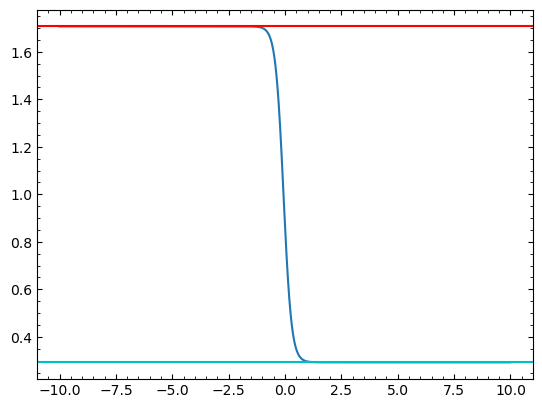

In [119]:
# Now for solving the differential equation

def dDeltaSdt(t, deltaS, args): # Need a modified version to be in the correct form for scipy
    """
    Defines the single equation ODE for Delta S rather than S1 and S2
    
    Parameters:
        deltaS: array, values to solve over
        args: array of form: [beta, alpha, deltaT, H, k]
            all elements are floats
    """
    return dS2dt(deltaS, args) - dS1dt(deltaS,args)

# Going to do 3 solutions (with each eq solution as its initial value)

args = [1,2,1,1,2]
s0 = AnalyticEQS(args)

sol = integ.solve_ivp(dDeltaSdt, [-10,10], [s0[0],10], args=[args],vectorized=True, atol=1e-16, rtol=3e-14)
plt.plot(sol.t,sol.y[0])
plt.axhline(s0[0], color = 'r')
plt.axhline(s0[1], color = 'c')